In [1]:
import sqlite3

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
conn = sqlite3.connect("sales_data.db")

In [6]:
cursor = conn.cursor()

In [17]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers(
id INTEGER PRIMARY KEY AUTOINCREMENT,
name TEXT,
age INTEGER,
city TEXT,
total_spent_  REAL
)
""")

conn.commit()


In [18]:
customers = [ 
("Mahesh Jadhav", 16,"New Delhi",1000),
("Nisha Kumari", 19, "Vizag",800),
("Brijesh Singh",21,"Ludhiana",500),
("Sudha Mihal", 22,"Mangalore",400),
("Jayesh Giri",24,"Surat",650)
]

cursor.executemany("INSERT INTO customers (name,age,city,total_spent_) VALUES(?,?,?,?)" ,customers)

conn.commit()

In [19]:
# run sql queries to retrieve data

query = "select * from customers"
df = pd.read_sql(query,conn)  #store sql results in pandas dataframe

#display data
df.head()

,id,name,age,city,total_spent_
0,1,Mahesh Jadhav,16,New Delhi,500.75
1,2,Nisha Kumari,19,Vizag,900.67
2,3,Brijesh Singh,21,Ludhiana,912.33
3,4,Sudha Mihal,22,Mangalore,788.32
4,5,Jayesh Giri,24,Surat,892.01


In [16]:
# perform data analysis using sql queries

query = "select * from customers where total_spent_ <600"
pd.read_sql(query,conn)

,id,name,age,city,total_spent_
0,1,Mahesh Jadhav,16,New Delhi,500.75
1,6,Mahesh Jadhav,16,New Delhi,500.75


In [20]:
#calculate average age

query = "select AVG(age) as avg_age from customers"
pd.read_sql(query,conn)

,avg_age
0,20.4


In [21]:
# visualizing sql results using python

query = "select city,SUM(total_spent_) as total_sales_ from customers group by city"
df_sales = pd.read_sql(query,conn)

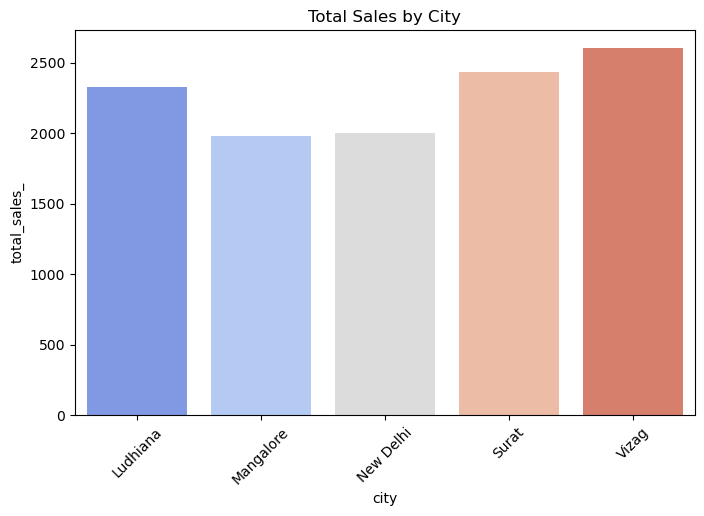

In [24]:
# plot data

plt.figure(figsize=(8,5))
sns.barplot(x="city", y="total_sales_" , data=df_sales, palette = "coolwarm")
plt.xticks(rotation = 45)
plt.title("Total Sales by City")
plt.show()

In [25]:
conn.close()